### Confusion matrix visualization  for  WHOI  classification work

In [308]:
import itertools
import numpy as np
import matplotlib.pyplot as plt



In [313]:
import pandas as pd

data = pd.io.parsers.read_table(
    filepath_or_buffer='/home/if/ChallengeAll/dataset/F_measure_103.txt',
    header=None,
    )
data.dropna(how='any', inplace=True)# how : {‘any’, ‘all’} any : if any NA values are present,drop that label


accuracy_data = pd.io.parsers.read_table(
    filepath_or_buffer='/home/if/ChallengeAll/dataset/accuracy.txt',
    header=None,
    )
data.tail(0)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,156,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,3113,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,5964,...,0,0,0,0,5,0,0,0,0,0


In [316]:
def percent2decimal(x):      # 百分数转换为小数
     return float(x.strip('%'))/100
accuracy = np.zeros(103)

sum = 0
for i in range(len(data)):   
    accuracy = percent2decimal(accuracy_data[0][i]) 
    #print accuary
    sum += accuracy
print ("average accuracy: %f"% float(sum/103))

result = np.loadtxt('/home/if/ChallengeAll/dataset/F_measure_103.txt')

num = 0
sum_precision = 0
sum_recall = 0
sum_F1_score = 0

for i in range(len(data)):
    #print data[i].sum()
    T_p = data[i][i]
    recall = float(T_p)/float(result[i].sum())    
    sum_recall += recall
    
    if data[i].sum() == 0 :
        precision = 0
    else:
        num+=1 
        precision = float(T_p)/float(data[i].sum())      
    sum_precision += precision
    if (recall == 0) or (precision ==0):
        F1_score = 0
    else:
        F1_score = 2*precision*recall/(precision + recall)
    print F1_score
    sum_F1_score += F1_score
   
print( 'F1_score:%f' % float(sum_F1_score/103)) 
print 2*sum_precision*sum_recall/(sum_precision+sum_recall)/103
#recall =  sum_recall/103
#F1_score =  2*precision*recall/(precision + recall)

average accuracy: 0.523724


ZeroDivisionError: float division by zero

### visuallization the confusion matrix

Confusion matrix, without normalization
[[ 596.   27.   57.   51.   19.    9.    7.   29.  197.    8.]
 [  50.  660.   41.   28.    9.    3.   14.   15.  105.   75.]
 [  95.   11.  433.  170.   88.   78.   36.   45.   42.    2.]
 [  33.    9.  113.  507.   58.  149.   42.   51.   25.   13.]
 [  45.   11.  208.  103.  379.   84.   65.   77.   25.    3.]
 [  21.    4.   84.  309.   55.  424.   20.   69.   12.    2.]
 [   4.   14.   97.  180.   99.   43.  517.   21.   14.   11.]
 [  28.    9.   57.  117.  102.  108.   16.  547.    9.    7.]
 [ 110.   52.   30.   37.    6.    7.    4.   11.  735.    8.]
 [  54.  173.   32.   63.    9.    5.   30.   53.  133.  448.]]


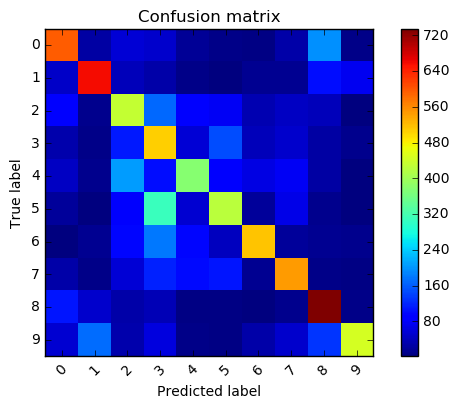

In [307]:
from sklearn.metrics import confusion_matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)
cnf_matrix = confusion_matrix(y_true, y_pred)

confusion_matrix = np.loadtxt('/home/if/ChallengeAll/dataset/mnist_conf.txt')

classesname = [0,1,2,3,4,5,6,7,8,9]

plot_confusion_matrix(confusion_matrix, normalize=False, classes = classesname, title='Confusion matrix' )
plt.show()

In [154]:


print result.sum()

True_positive = np.diag(np.diag(result))


print True_positive.sum()
  
for i in range(len(result)):
    for classes in result:
        print classes.sum()  # 每一类所有的值
    
print result.shape

1169584.0
2.0
1090618.0
2.0
73.0
70.0
618.0
5.0
3322.0
132.0
11.0
7.0
7229.0
48.0
262.0
15653.0
168.0
476.0
50.0
92.0
324.0
172.0
5066.0
97.0
5.0
2129.0
237.0
6944.0
1969.0
4340.0
134.0
126167.0
243.0
786.0
8.0
15906.0
2515.0
60.0
119.0
1721.0
86.0
50.0
211.0
731.0
255.0
9.0
635.0
272.0
145.0
989.0
188.0
12756.0
430.0
1078.0
226.0
6.0
471.0
2.0
132.0
175.0
490.0
99.0
82.0
41897.0
131.0
105.0
1155.0
853560.0
21266.0
28.0
909.0
218.0
7.0
1661.0
74.0
276.0
775.0
35.0
723.0
5.0
1281.0
197.0
25.0
71.0
1243.0
199.0
12811.0
5704.0
120.0
18.0
81.0
16.0
29.0
72.0
227.0
100.0
48.0
53.0
1868.0
4159.0
665.0
5.0
936.0
16.0
117.0
20.0
2.0
73.0
70.0
618.0
5.0
3322.0
132.0
11.0
7.0
7229.0
48.0
262.0
15653.0
168.0
476.0
50.0
92.0
324.0
172.0
5066.0
97.0
5.0
2129.0
237.0
6944.0
1969.0
4340.0
134.0
126167.0
243.0
786.0
8.0
15906.0
2515.0
60.0
119.0
1721.0
86.0
50.0
211.0
731.0
255.0
9.0
635.0
272.0
145.0
989.0
188.0
12756.0
430.0
1078.0
226.0
6.0
471.0
2.0
132.0
175.0
490.0
99.0
82.0
41897.0
131.0
105.0
